# Predict A Doctor's Consultation Fee

We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? This is the use case that let's you do that. 

Size of training set: 5961 records

Size of test set: 1987 records



FEATURES:

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaneous_Info: Extra information about the doctor

Fees: Fees charged by the doctor (Target Variable)

Place: Area and the city where the doctor is located.



In [1]:
# Importing all required libraries

In [55]:
# Generic
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Encode
from sklearn.preprocessing import LabelEncoder

# Skewness
from sklearn.preprocessing import power_transform

# Regression models
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Train Test Split
from sklearn.model_selection import train_test_split

#Optimization
from sklearn.model_selection import GridSearchCV

# Warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Import Data
df = pd.read_csv("Doctor's Consultation Project/Final_Train_Data.csv")
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [4]:
#Check Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [5]:
#Check missing values
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [6]:
# Dropping of miscellaneous_Info column as it looks to be repetition of columns.
df.drop('Miscellaneous_Info', axis = 1, inplace = True)
df

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,250
...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,100


In [7]:
# Convert Rating into integrer and replace blanks with 0%
df['Rating'].fillna('0%',inplace = True)
df['Rating'] = df['Rating'].str.slice(stop=-1).astype(int)

In [8]:
df

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98,"Whitefield, Bangalore",Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,0,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"BSc - Zoology, BAMS",12 years experience,0,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20 years experience,100,"Keelkattalai, Chennai",Ayurveda,250
...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98,"Basavanagudi, Bangalore",ENT Specialist,300
5957,MBBS,33 years experience,0,"Nungambakkam, Chennai",General Medicine,100
5958,MBBS,41 years experience,97,"Greater Kailash Part 2, Delhi",General Medicine,600
5959,"MBBS, MD - General Medicine",15 years experience,90,"Vileparle West, Mumbai",General Medicine,100


In [9]:
df.isnull().sum()

Qualification     0
Experience        0
Rating            0
Place            25
Profile           0
Fees              0
dtype: int64

In [10]:
df['Place'].mode()

0    HSR Layout, Bangalore
dtype: object

In [11]:
df['Place'].fillna('HSR Layout, Bangalore', inplace = True)

In [12]:
df.isnull().sum()

Qualification    0
Experience       0
Rating           0
Place            0
Profile          0
Fees             0
dtype: int64

Now our dataset have no null values.

We can remove the text part in Experience column to make it integer.

In [13]:
df['Experience'].unique()

array(['24 years experience', '12 years experience', '9 years experience',
       '20 years experience', '8 years experience', '42 years experience',
       '10 years experience', '14 years experience',
       '23 years experience', '5 years experience', '7 years experience',
       '21 years experience', '19 years experience',
       '41 years experience', '31 years experience',
       '25 years experience', '16 years experience',
       '15 years experience', '11 years experience',
       '22 years experience', '38 years experience', '6 years experience',
       '36 years experience', '13 years experience',
       '18 years experience', '46 years experience',
       '40 years experience', '49 years experience',
       '33 years experience', '0 years experience', '27 years experience',
       '30 years experience', '52 years experience',
       '60 years experience', '26 years experience',
       '35 years experience', '34 years experience',
       '39 years experience', '32 years exp

In [14]:
df['Experience'] = df['Experience'].str.slice(stop=2).astype(int)
df

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24,100,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12,98,"Whitefield, Bangalore",Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9,0,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"BSc - Zoology, BAMS",12,0,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20,100,"Keelkattalai, Chennai",Ayurveda,250
...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,98,"Basavanagudi, Bangalore",ENT Specialist,300
5957,MBBS,33,0,"Nungambakkam, Chennai",General Medicine,100
5958,MBBS,41,97,"Greater Kailash Part 2, Delhi",General Medicine,600
5959,"MBBS, MD - General Medicine",15,90,"Vileparle West, Mumbai",General Medicine,100


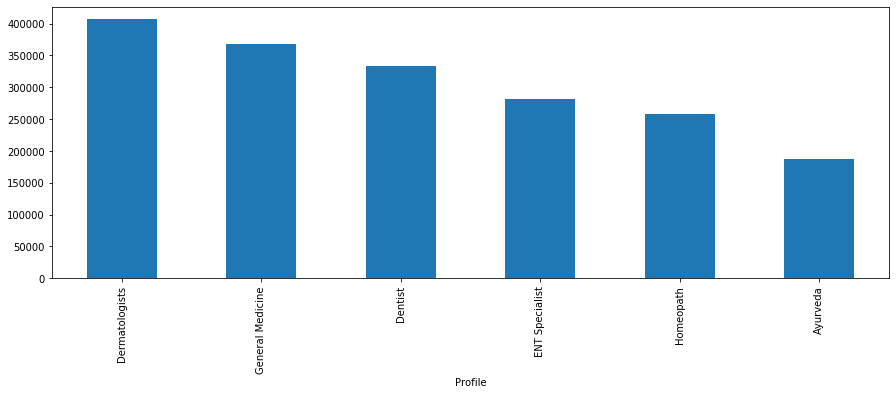

In [15]:
df.groupby("Profile")["Fees"].sum().sort_values(ascending=False).plot(kind="bar",figsize=(15,5))

Dermatologists are most costly while ayurveda is the cheapest

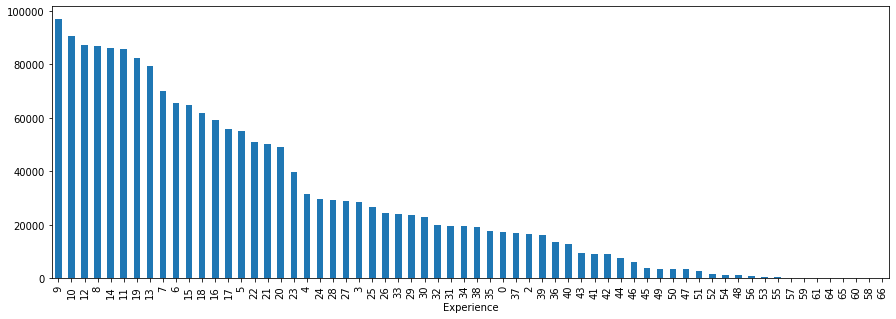

In [16]:
df.groupby("Experience")["Fees"].sum().sort_values(ascending=False).plot(kind="bar",figsize=(15,5))

Relationship between experience and fee is also doesn't seem to be linear

We can encode train columns into numbers

In [17]:
l = LabelEncoder()
df['Qualification'] = l.fit_transform(df['Qualification'])
df

,Qualification,Experience,Rating,Place,Profile,Fees
0,401,24,100,"Kakkanad, Ernakulam",Homeopath,100
1,73,12,98,"Whitefield, Bangalore",Ayurveda,350
2,1135,9,0,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,464,12,0,"Bannerghatta Road, Bangalore",Ayurveda,250
4,10,20,100,"Keelkattalai, Chennai",Ayurveda,250
...,...,...,...,...,...,...
5956,1075,19,98,"Basavanagudi, Bangalore",ENT Specialist,300
5957,596,33,0,"Nungambakkam, Chennai",General Medicine,100
5958,596,41,97,"Greater Kailash Part 2, Delhi",General Medicine,600
5959,943,15,90,"Vileparle West, Mumbai",General Medicine,100


In [18]:
l = LabelEncoder()
df['Place'] = l.fit_transform(df['Place'])
df

,Qualification,Experience,Rating,Place,Profile,Fees
0,401,24,100,299,Homeopath,100
1,73,12,98,866,Ayurveda,350
2,1135,9,0,457,ENT Specialist,300
3,464,12,0,68,Ayurveda,250
4,10,20,100,337,Ayurveda,250
...,...,...,...,...,...,...
5956,1075,19,98,70,ENT Specialist,300
5957,596,33,0,541,General Medicine,100
5958,596,41,97,216,General Medicine,600
5959,943,15,90,850,General Medicine,100


In [19]:
df['Profile'] = l.fit_transform(df['Profile'])
df

,Qualification,Experience,Rating,Place,Profile,Fees
0,401,24,100,299,5,100
1,73,12,98,866,0,350
2,1135,9,0,457,3,300
3,464,12,0,68,0,250
4,10,20,100,337,0,250
...,...,...,...,...,...,...
5956,1075,19,98,70,3,300
5957,596,33,0,541,4,100
5958,596,41,97,216,4,600
5959,943,15,90,850,4,100


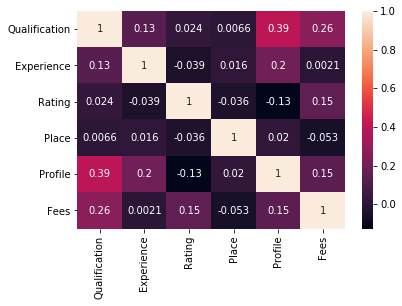

In [20]:
sns.heatmap(df.corr(), annot = True)

As we can see from the above diagram, strangely Experience has very less correlation with Fee. QUalification and profile has more correlation

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
# Splitting of X and Y
Y = df["Fees"]
X = df.drop('Fees', axis = 1)

In [23]:
Y = Y.values.reshape(-1,1)
Y.shape

(5961, 1)

In [24]:
# Checking skewness
X.skew()

Qualification    0.239720
Experience       0.991089
Rating           0.247186
Place            0.124862
Profile          0.108803
dtype: float64

In [25]:
pt=power_transform(X, method='yeo-johnson')
X=pd.DataFrame(pt, columns=X.columns)
X.skew()

Qualification   -0.298616
Experience       0.000692
Rating           0.218550
Place           -0.263388
Profile         -0.139151
dtype: float64

In [26]:
# Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))
X

,0,1,2,3,4
0,-0.268192,0.737357,1.132689,-0.298729,1.420559
1,-1.399319,-0.325180,1.126487,1.521043,-1.644145
2,1.173386,-0.688374,-0.897118,0.286121,0.418830
3,-0.112357,-0.325180,-0.897118,-1.457929,-1.644145
4,-1.876273,0.430174,1.132689,-0.149246,-1.644145
...,...,...,...,...,...
5956,1.075936,0.347478,1.126487,-1.444078,0.418830
5957,0.186081,1.326351,-0.897118,0.565630,0.940156
5958,0.186081,1.768994,1.123332,-0.652560,0.940156
5959,0.852548,-0.013448,1.100159,1.477563,0.940156


In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 90)
print(Y_train.shape, Y_test.shape)

(4768, 1) (1193, 1)


# Model building

In [53]:
def model_sel(mod):
    maxscore=0
    maxstate=0
    for x in range(42,105):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=x)
        model=mod()
        model.fit(X_train,Y_train)
        predict=model.predict(X_test)
        r2score=r2_score(Y_test,predict)
        if r2score>maxscore:
            maxscore=r2score
            maxstate=x
    print("Max Score is {} at max state {}".format(maxscore,maxstate))

In [28]:
model_sel(LinearRegression)

Max Score is 0.11965676289504112 at max state 74


In [29]:
model_sel(Lasso)

Max Score is 0.11878266366118184 at max state 74


In [30]:
model_sel(Ridge)

Max Score is 0.11964916726445674 at max state 74


In [31]:
model_sel(ElasticNet)

Max Score is 0.10135681849554612 at max state 74


In [32]:
model_sel(KNeighborsRegressor)

Max Score is 0.07616380197423378 at max state 44


In [33]:
model_sel(DecisionTreeRegressor)

Max Score is 0 at max state 0


In [34]:
model_sel(RandomForestRegressor)

Max Score is 0.16949156164705914 at max state 44


In [35]:
model_sel(SVR)

Max Score is 0.10035326032696934 at max state 101


In [36]:
model_sel(AdaBoostRegressor)

Max Score is 0.1348423833123158 at max state 59


We will check cross validation scores for observing underfitting and overfitting conditions.

In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
scr1= cross_val_score(LinearRegression(),X,Y,cv=5)
print('Cross Validation Score is :', scr1.mean())

Cross Validation Score is : 0.09807660392407383


In [39]:
scr2= cross_val_score(Lasso(),X,Y,cv=5)
print('Cross Validation Score is :', scr2.mean())

Cross Validation Score is : 0.0980610236759053


In [40]:
scr3= cross_val_score(Ridge(),X,Y,cv=5)
print('Cross Validation Score is :', scr3.mean())

Cross Validation Score is : 0.09807724969891099


In [41]:
scr4= cross_val_score(ElasticNet(),X,Y,cv=5)
print('Cross Validation Score is :', scr4.mean())

Cross Validation Score is : 0.08946381474277276


In [42]:
scr5= cross_val_score(KNeighborsRegressor(),X,Y,cv=5)
print('Cross Validation Score is :', scr5.mean())

Cross Validation Score is : 0.02343134580999755


In [43]:
scr6= cross_val_score(DecisionTreeRegressor(),X,Y,cv=5)
print('Cross Validation Score is :', scr6.mean())

Cross Validation Score is : -0.5975104715667875


In [44]:
scr7= cross_val_score(RandomForestRegressor(),X,Y,cv=5)
print('Cross Validation Score is :', scr7.mean())

Cross Validation Score is : 0.14087823986007905


In [45]:
scr8= cross_val_score(SVR(),X,Y,cv=5)
print('Cross Validation Score is :', scr8.mean())

Cross Validation Score is : 0.07557615903524736


In [49]:
scr9= cross_val_score(AdaBoostRegressor(),X,Y,cv=5)
print('Cross Validation Score is :', scr9.mean())

Cross Validation Score is : 0.10437321995048192


# Hyper parameter tuning

In [58]:
parameter={'max_depth':np.arange(2,15)}   #Creating parameter list to pass in GridSearchCV
GCV= GridSearchCV(RandomForestRegressor(),parameter,cv=5)
GCV.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [59]:
GCV.best_params_  # Printing the best parameter found by GridSearchCV

{'max_depth': 7}

In [60]:
#Save the model
joblib.dump(RandomForestRegressor(),"Doctor's consultation fees.obj")

["Doctor's consultation fees.obj"]

In [61]:
# Loading test data
df = pd.read_csv("Doctor's Consultation Project/Final_Test_Data.csv")
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


In [63]:
#Checking null values
df.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [64]:
df['Place'] = df['Place'].str.strip()

In [65]:
# Convert Rating into integrer and replace blanks with 0%
df['Rating'].fillna('0%',inplace = True)
df['Rating'] = df['Rating'].str.slice(stop=-1).astype(int)

In [66]:
# Dropping of miscellaneous_Info column as it looks to be repetition of columns.
df.drop('Miscellaneous_Info', axis = 1, inplace = True)
df

,Qualification,Experience,Rating,Place,Profile
0,MBBS,35 years experience,0,"Ghatkopar East, Mumbai",General Medicine
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,0,"West Marredpally, Hyderabad",ENT Specialist
2,"MBBS, DDVL",40 years experience,70,"KK Nagar, Chennai",Dermatologists
3,BAMS,0 years experience,0,"New Ashok Nagar, Delhi",Ayurveda
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100,"Kanakpura Road, Bangalore",Dentist
...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,0,"Basavanagudi, Bangalore",Ayurveda
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,0,"Choolai, Chennai",Dermatologists
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,0,"Porur, Chennai",General Medicine
1985,BDS,12 years experience,98,"Arekere, Bangalore",Dentist


In [67]:
df.isnull().sum()

Qualification    0
Experience       0
Rating           0
Place            6
Profile          0
dtype: int64

In [68]:
df['Place'].mode()

0    Andheri West, Mumbai
1     Mulund West, Mumbai
dtype: object

In [69]:
df['Place'].fillna('Andheri West, Mumbai', inplace = True)

In [70]:
df.isnull().sum()

Qualification    0
Experience       0
Rating           0
Place            0
Profile          0
dtype: int64

In [71]:
# In Experience column, we can remove the text part to make it integer
df['Experience'] = df['Experience'].str.slice(stop=2).astype(int)
df

,Qualification,Experience,Rating,Place,Profile
0,MBBS,35,0,"Ghatkopar East, Mumbai",General Medicine
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,0,"West Marredpally, Hyderabad",ENT Specialist
2,"MBBS, DDVL",40,70,"KK Nagar, Chennai",Dermatologists
3,BAMS,0,0,"New Ashok Nagar, Delhi",Ayurveda
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100,"Kanakpura Road, Bangalore",Dentist
...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10,0,"Basavanagudi, Bangalore",Ayurveda
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4,0,"Choolai, Chennai",Dermatologists
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9,0,"Porur, Chennai",General Medicine
1985,BDS,12,98,"Arekere, Bangalore",Dentist


We can encode test columns into numbers

In [72]:
l = LabelEncoder()
df['Qualification'] = l.fit_transform(df['Qualification'])
df

,Qualification,Experience,Rating,Place,Profile
0,241,35,0,"Ghatkopar East, Mumbai",General Medicine
1,340,31,0,"West Marredpally, Hyderabad",ENT Specialist
2,258,40,70,"KK Nagar, Chennai",Dermatologists
3,6,0,0,"New Ashok Nagar, Delhi",Ayurveda
4,79,16,100,"Kanakpura Road, Bangalore",Dentist
...,...,...,...,...,...
1982,17,10,0,"Basavanagudi, Bangalore",Ayurveda
1983,548,4,0,"Choolai, Chennai",Dermatologists
1984,474,9,0,"Porur, Chennai",General Medicine
1985,51,12,98,"Arekere, Bangalore",Dentist


In [73]:
l = LabelEncoder()
df['Place'] = l.fit_transform(df['Place'])
df

,Qualification,Experience,Rating,Place,Profile
0,241,35,0,142,General Medicine
1,340,31,0,580,ENT Specialist
2,258,40,70,212,Dermatologists
3,6,0,0,374,Ayurveda
4,79,16,100,231,Dentist
...,...,...,...,...,...
1982,17,10,0,58,Ayurveda
1983,548,4,0,96,Dermatologists
1984,474,9,0,424,General Medicine
1985,51,12,98,26,Dentist


In [74]:
l = LabelEncoder()
df['Profile'] = l.fit_transform(df['Profile'])
df

,Qualification,Experience,Rating,Place,Profile
0,241,35,0,142,4
1,340,31,0,580,3
2,258,40,70,212,2
3,6,0,0,374,0
4,79,16,100,231,1
...,...,...,...,...,...
1982,17,10,0,58,0
1983,548,4,0,96,2
1984,474,9,0,424,4
1985,51,12,98,26,1


In [75]:
X

,0,1,2,3,4
0,-0.268192,0.737357,1.132689,-0.298729,1.420559
1,-1.399319,-0.325180,1.126487,1.521043,-1.644145
2,1.173386,-0.688374,-0.897118,0.286121,0.418830
3,-0.112357,-0.325180,-0.897118,-1.457929,-1.644145
4,-1.876273,0.430174,1.132689,-0.149246,-1.644145
...,...,...,...,...,...
5956,1.075936,0.347478,1.126487,-1.444078,0.418830
5957,0.186081,1.326351,-0.897118,0.565630,0.940156
5958,0.186081,1.768994,1.123332,-0.652560,0.940156
5959,0.852548,-0.013448,1.100159,1.477563,0.940156


In [76]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))
X

,0,1,2,3,4
0,-0.268192,0.737357,1.132689,-0.298729,1.420559
1,-1.399319,-0.325180,1.126487,1.521043,-1.644145
2,1.173386,-0.688374,-0.897118,0.286121,0.418830
3,-0.112357,-0.325180,-0.897118,-1.457929,-1.644145
4,-1.876273,0.430174,1.132689,-0.149246,-1.644145
...,...,...,...,...,...
5956,1.075936,0.347478,1.126487,-1.444078,0.418830
5957,0.186081,1.326351,-0.897118,0.565630,0.940156
5958,0.186081,1.768994,1.123332,-0.652560,0.940156
5959,0.852548,-0.013448,1.100159,1.477563,0.940156


In [77]:
rfr=RandomForestRegressor(n_estimators=50)
rfr.fit(X_train,Y_train)
predict=rfr.predict(X_test)
predict

array([460., 422., 203., ..., 458., 359., 241.])

In [78]:
fee_out = pd.DataFrame(data = predict, columns = ['Fees'])
fee_out

,Fees
0,460.0
1,422.0
2,203.0
3,245.0
4,230.0
...,...
1188,304.8
1189,619.0
1190,458.0
1191,359.0


# Conclusion

In this dataset we can conclude that as per our observation RandomForestRegressor is the best model to predict the target variable of our test dataset. This model gives the best prediction solutions as per other model used above.